In [0]:
!unzip competitive-data-science-predict-future-sales.zip

Archive:  competitive-data-science-predict-future-sales.zip
  inflating: test.csv.gz             
  inflating: sample_submission.csv.gz  
  inflating: sales_train.csv.gz      
  inflating: shops.csv               
  inflating: item_categories.csv     
  inflating: items.csv               


In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [0]:
'''
データのロード
'''
train = pd.read_csv('sales_train.csv.gz')
test = pd.read_csv('test.csv.gz')

In [3]:
'''
クリーニング
'''

'\nクリーニング\n'

In [0]:
# object -> datetime
train['date'] = pd.to_datetime(train['date'], format = '%d.%m.%Y')

In [0]:
# date_block_num, date, shop_id, item_id => index
train.set_index(['shop_id', 'date_block_num', 'date'],inplace=True)
train.sort_index(inplace = True)

In [0]:
# 実際に使用するデータのみ抽出
test_shop_id = test['shop_id'].unique()
test_item_id = test['item_id'].unique()
df = train.loc(axis=0)[(test_shop_id, slice(None), slice(None))]

In [8]:
df_convined = []
count = 1
for shop_id in test_shop_id:
  df_shop = df.loc(axis=0)[(shop_id, slice(None), slice(None))]
  i = 0
  for item_id in test_item_id:   
    if (item_id in np.asarray(df_shop['item_id'])) == True:
      _ = df_shop.where(df_shop['item_id']==item_id).dropna()
      df_convined.append(_)
    i += 1
    print('\rcount: %d/%d   |   items: %d/%d' %(count, len(test_shop_id), i, len(test_item_id)), end='')
  count += 1

count: 41/42   |   items: 5100/5100

In [0]:
df_convined[0]

In [0]:
'''
データの保存
'''
import pickle

pickle_file = "./PredictFutureSales_data_picked.pickle"
with open(pickle_file, 'wb') as f:
    pickle.dump(df_convined, f)

In [0]:
'''
データのロード
'''
import pickle
pickle_file = "./PredictFutureSales_data_picked.pickle"
with open(pickle_file, 'rb') as f:
    df_convined = pickle.load(f)

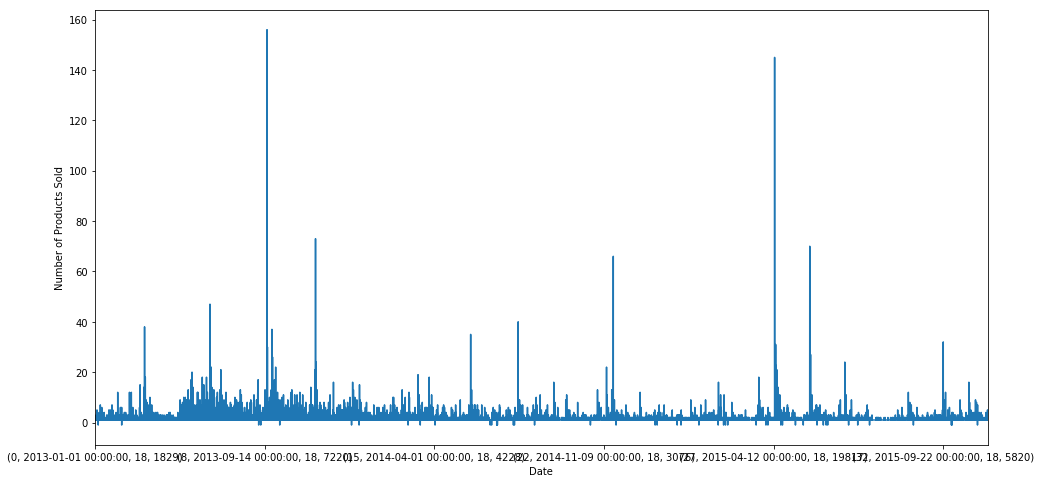

In [0]:
plt.figure(figsize=(16,8))
df_18['item_cnt_day'].plot()
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.show()

In [0]:
test_item_id

array([ 5037,  5320,  5233, ..., 15757, 19648,   969])